# Import necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the data

In [2]:
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.shape

(150, 5)

In [4]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

# Data cleaning, data wrangling, data preprocessing

In [5]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Data visualizations

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

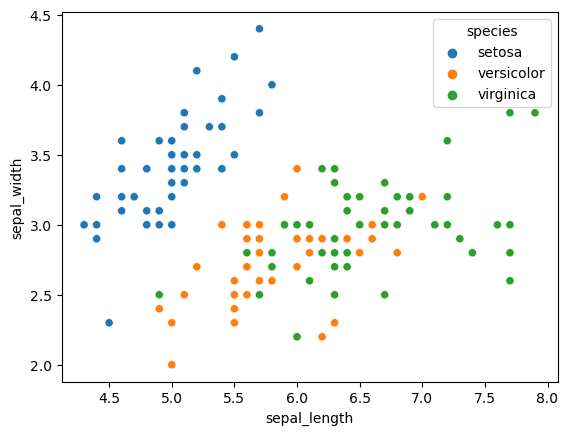

In [6]:
sns.scatterplot(x=data['sepal_length'],y=data['sepal_width'], hue=data['species'])

<Axes: xlabel='petal_length', ylabel='petal_width'>

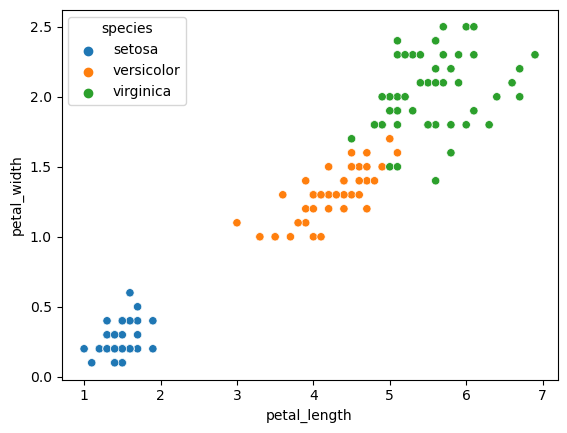

In [7]:
sns.scatterplot(x=data['petal_length'],y=data['petal_width'], hue=data['species'])

<Axes: xlabel='species', ylabel='count'>

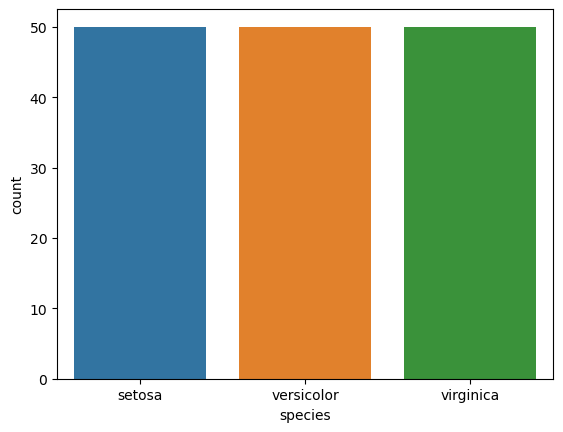

In [8]:
sns.countplot(x=data['species'])

## Feature scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms

MinMaxScaler()

In [10]:
data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = mms.fit_transform(data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,setosa
1,0.166667,0.416667,0.067797,0.041667,setosa
2,0.111111,0.500000,0.050847,0.041667,setosa
3,0.083333,0.458333,0.084746,0.041667,setosa
4,0.194444,0.666667,0.067797,0.041667,setosa


## feature encoding

In [11]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [12]:
dic = {'setosa':0, 'versicolor':1, 'virginica':2}
data['species'] = data[['species']].replace(dic)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


# separate x and y

In [13]:
x = data.drop('species',axis=1)
y = data['species']

# split the data

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = 0)

# apply decision tree classifier on the train dataset

In [15]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree

DecisionTreeClassifier()

In [16]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

# Perform predictions

In [17]:
y_pred = tree.predict(x_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2], dtype=int64)

# evaluation

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9736842105263158

[Text(0.4, 0.9, 'petal_width <= 0.292\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.5, 0.7, 'petal_length <= 0.669\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(0.2, 0.5, 'petal_width <= 0.646\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.3, 0.3, 'sepal_width <= 0.458\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'petal_length <= 0.686\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(0.7, 0.3, 'sepal_width <= 0.312\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]')]

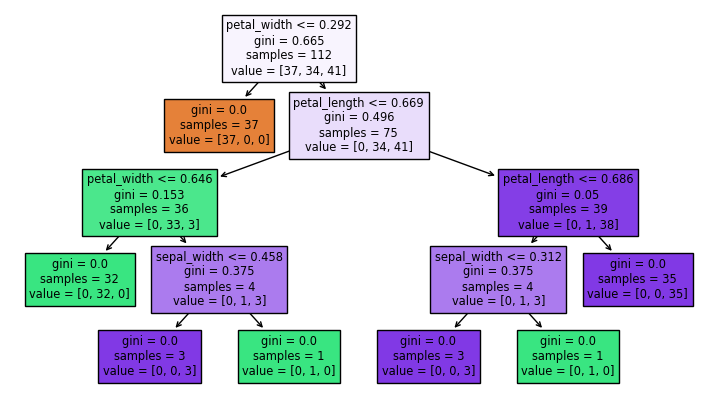

In [19]:
plt.figure(figsize=(9,5))

from sklearn.tree import plot_tree
plot_tree(tree,feature_names=x.columns, filled = True)